In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

data=pd.read_csv('/content/EV.csv')



**EDA**

In [ ]:

model_feature= ['Battery Capacity (kWh)','Energy Consumed (kWh)','State of Charge (Start %)','State of Charge (End %)','Distance Driven (since last charge) (km)','Temperature (°C)','Vehicle Age (years)','Vehicle Model']

#Selecting feature for model training
data_filtered = data[model_feature]
print(data_filtered.columns)
data_filtered = data_filtered.reset_index(drop=True)
total_rows=len(data_filtered)


Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Vehicle Model'],
      dtype='object')


In [ ]:

#preprocessing

#finding missing value (stats 1)
print("*******************************************************************")
none_val1=data_filtered.isnull().sum()
none_val=data_filtered.isnull().sum().sum()
missing_perc=(none_val/1320)*100
print("*******************************************************************")
print(none_val1)
print("*******************************************************************")
print("Msiisng percentage:",missing_perc)
print("msiing value: ",none_val)
print("*******************************************************************")
data_filtered.info()
print("*******************************************************************")

*******************************************************************
*******************************************************************
Battery Capacity (kWh)                       0
Energy Consumed (kWh)                       66
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Vehicle Model                                0
dtype: int64
*******************************************************************
Msiisng percentage: 10.0
msiing value:  132
*******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Battery Capacity (kWh)                    

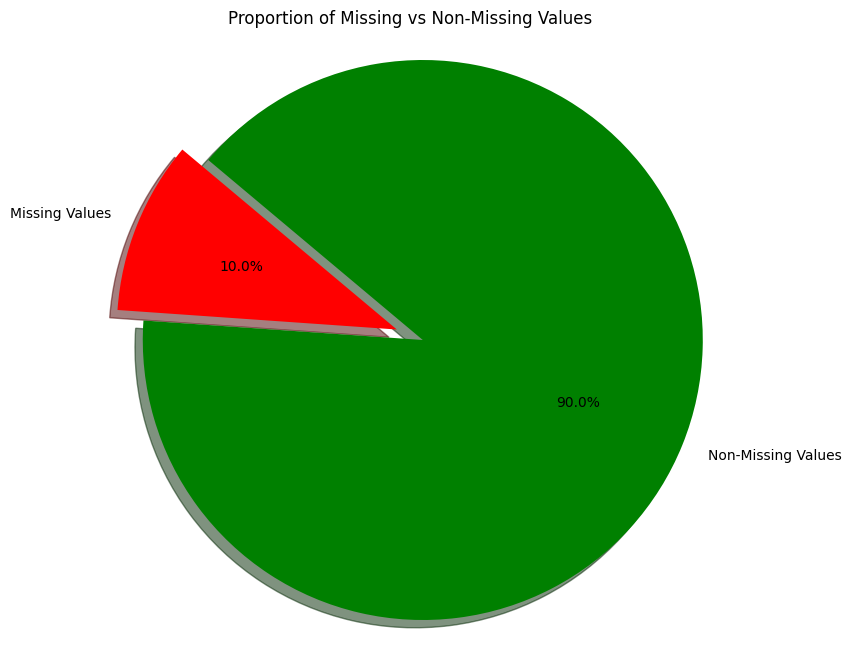

In [ ]:
#Visualization of missing value
labels = ['Missing Values', 'Non-Missing Values']
sizes = [none_val, total_rows - none_val]
colors = ['red', 'green']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion of Missing vs Non-Missing Values')
plt.show()


In [ ]:
# handling missing values in target variable
data_Filtered_target_drop=data_filtered.dropna(subset=['Distance Driven (since last charge) (km)'])
#Handling Missing value in Column Energy consumed
data_Filtered_train_drop=data_Filtered_target_drop.dropna(subset=['Energy Consumed (kWh)'])
none_val1=data_Filtered_train_drop.isnull().sum()
print(none_val1)
data_Filtered_train_drop.columns



Battery Capacity (kWh)                      0
Energy Consumed (kWh)                       0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Vehicle Model                               0
dtype: int64


Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Vehicle Model'],
      dtype='object')

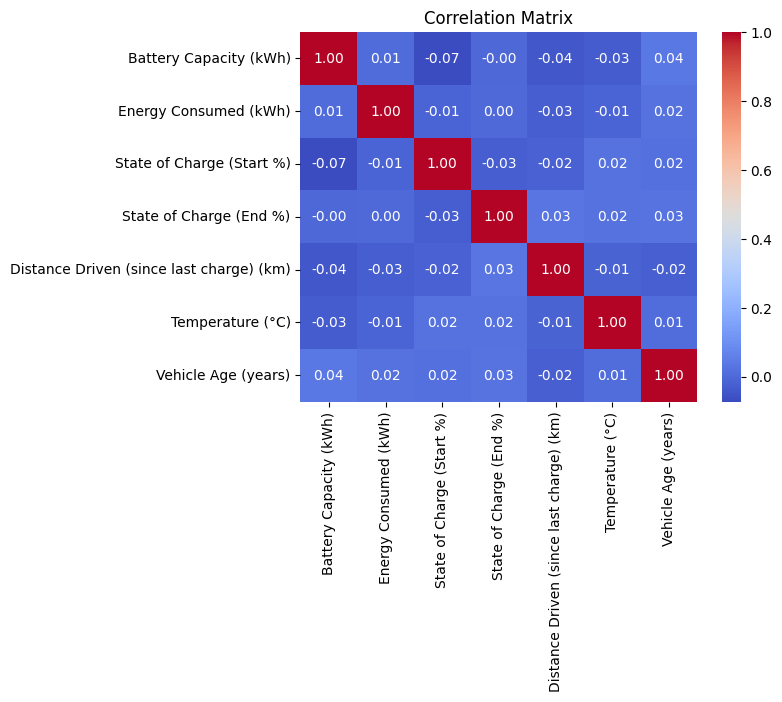

                                          Battery Capacity (kWh)  \
Battery Capacity (kWh)                                  1.000000   
Energy Consumed (kWh)                                   0.006870   
State of Charge (Start %)                              -0.072489   
State of Charge (End %)                                -0.002178   
Distance Driven (since last charge) (km)               -0.043686   
Temperature (°C)                                       -0.031274   
Vehicle Age (years)                                     0.037490   

                                          Energy Consumed (kWh)  \
Battery Capacity (kWh)                                 0.006870   
Energy Consumed (kWh)                                  1.000000   
State of Charge (Start %)                             -0.011750   
State of Charge (End %)                                0.001844   
Distance Driven (since last charge) (km)              -0.027948   
Temperature (°C)                                     

In [ ]:
#Correlation matrix
data_numeric = data_Filtered_train_drop.select_dtypes(include=[np.number])
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

**Outlier detection**

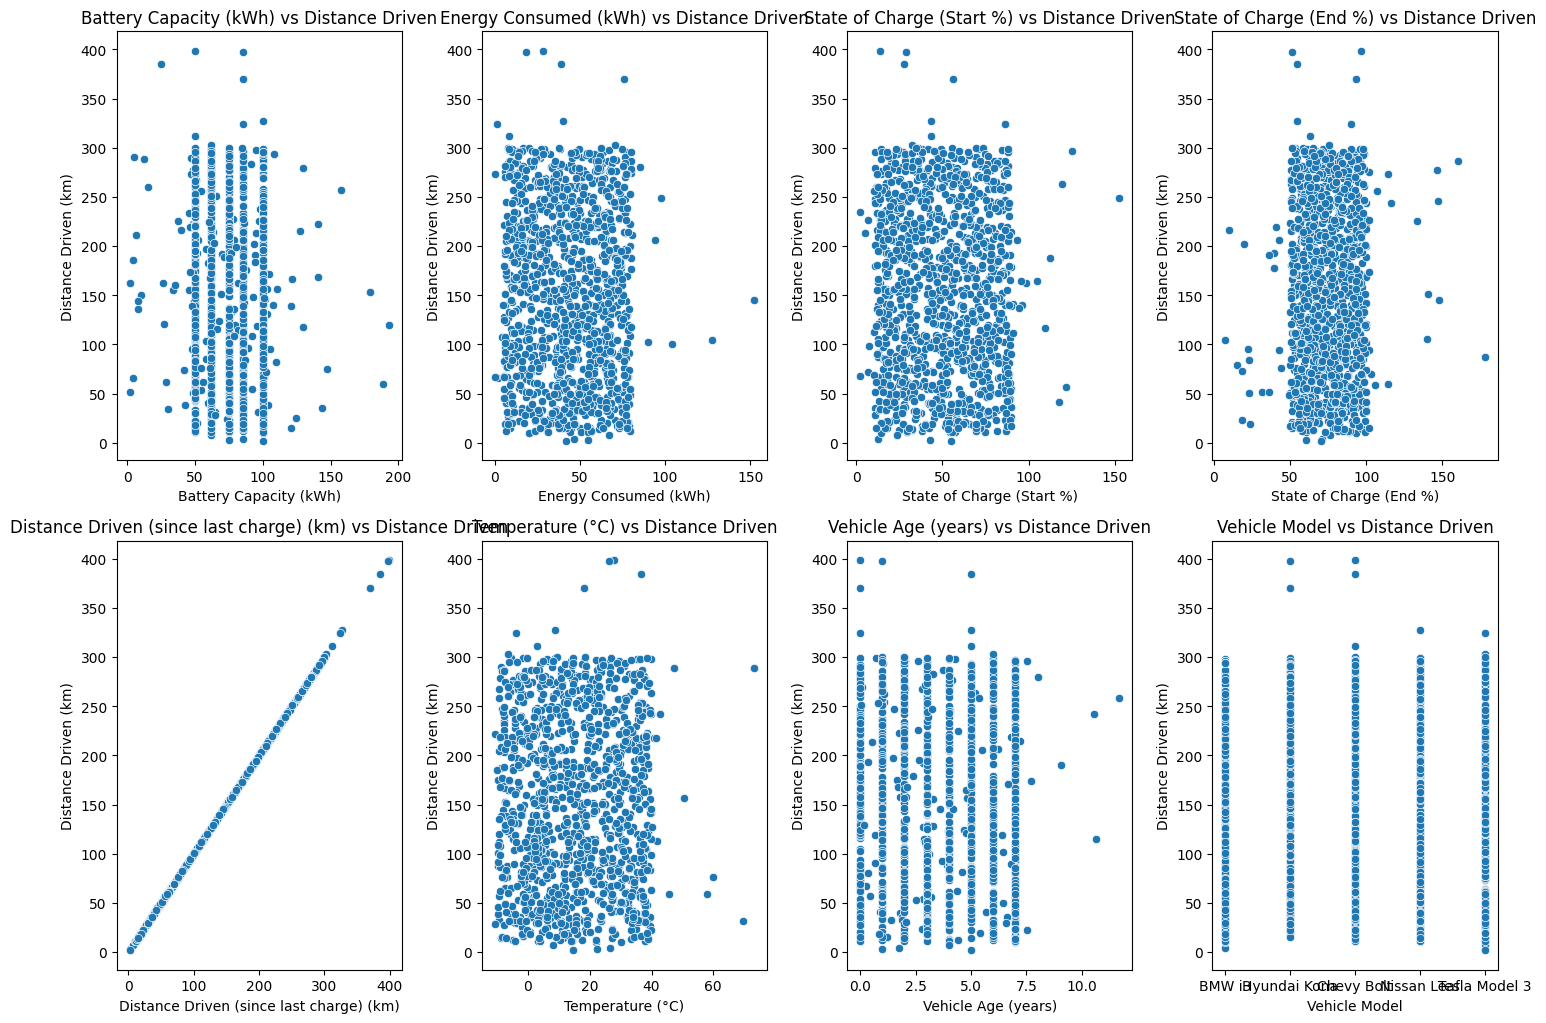

In [ ]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(model_feature, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=feature, y='Distance Driven (since last charge) (km)', data=data_Filtered_train_drop)
    plt.title(f'{feature} vs Distance Driven')
    plt.xlabel(feature)
    plt.ylabel('Distance Driven (km)')
    plt.tight_layout()
plt.show()


**Removing outliers**

In [ ]:


import pandas as pd
data_Filtered_train_drop = data_Filtered_train_drop[data_Filtered_train_drop['Distance Driven (since last charge) (km)'] <= 300]

data_Filtered_train_drop

,Battery Capacity (kWh),Energy Consumed (kWh),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Vehicle Model
0,108.463007,60.712346,29.371576,86.119962,293.602111,27.947953,2.0,BMW i3
1,100.000000,12.339275,10.115778,84.664344,112.112804,14.311026,3.0,Hyundai Kona
2,75.000000,19.128876,6.854604,69.917615,71.799253,21.002002,2.0,Chevy Bolt
3,50.000000,79.457824,83.120003,99.624328,199.577785,38.316313,1.0,Hyundai Kona
4,50.000000,19.629104,54.258950,63.743786,203.661847,-7.834199,1.0,Hyundai Kona
...,...,...,...,...,...,...,...,...
1315,100.000000,42.011654,39.204102,83.915952,239.601075,1.919655,7.0,Nissan Leaf
1316,100.000000,68.185853,31.456375,93.096461,164.376022,34.029775,4.0,BMW i3
1317,100.000000,18.895102,71.903081,78.678879,226.519258,20.358761,5.0,Nissan Leaf
1318,85.000000,13.756251,76.187997,65.926573,291.494076,24.134598,5.0,Chevy Bolt


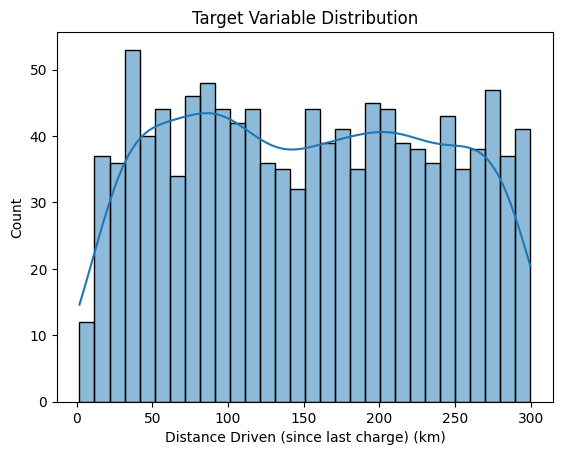

In [ ]:
# Plot distribution of the target variable
sns.histplot(data_Filtered_train_drop['Distance Driven (since last charge) (km)'], bins=30, kde=True)
plt.title('Target Variable Distribution')
plt.show()


In [ ]:
#checking for classs imbalance
class_counts = data_Filtered_train_drop['Distance Driven (since last charge) (km)'].value_counts()
print(class_counts)


Distance Driven (since last charge) (km)
293.602111    1
124.078646    1
238.865010    1
85.382394     1
121.435293    1
             ..
127.334841    1
59.591455     1
51.918511     1
207.671984    1
14.449236     1
Name: count, Length: 1185, dtype: int64


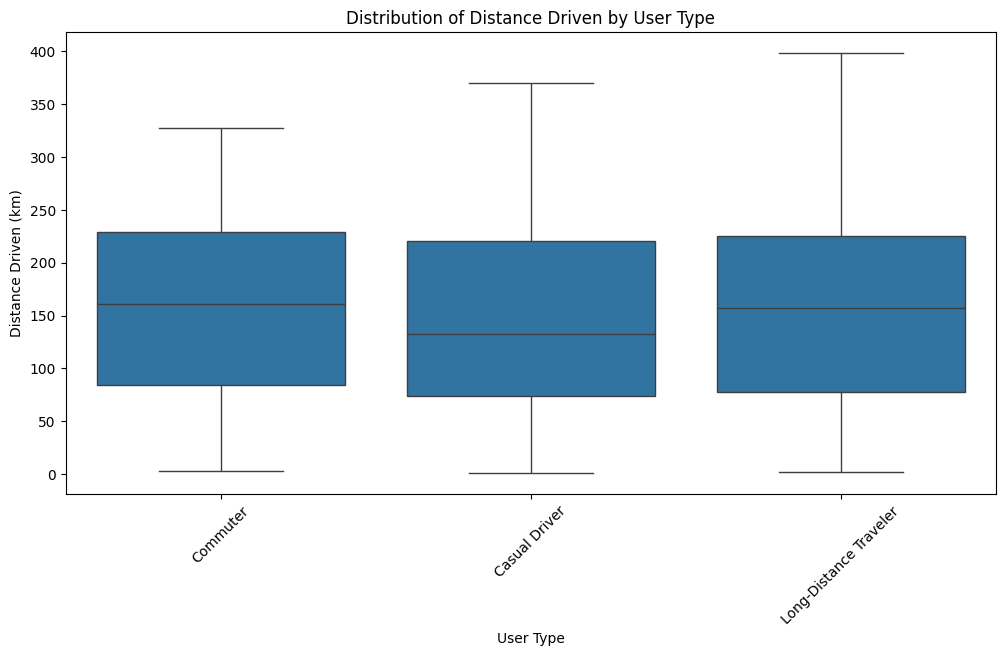

In [ ]:
# Boxplot for 'Distance Driven' by 'User Type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='User Type', y='Distance Driven (since last charge) (km)', data=data)
plt.title('Distribution of Distance Driven by User Type')
plt.xlabel('User Type')
plt.ylabel('Distance Driven (km)')
plt.xticks(rotation=45)
plt.show()

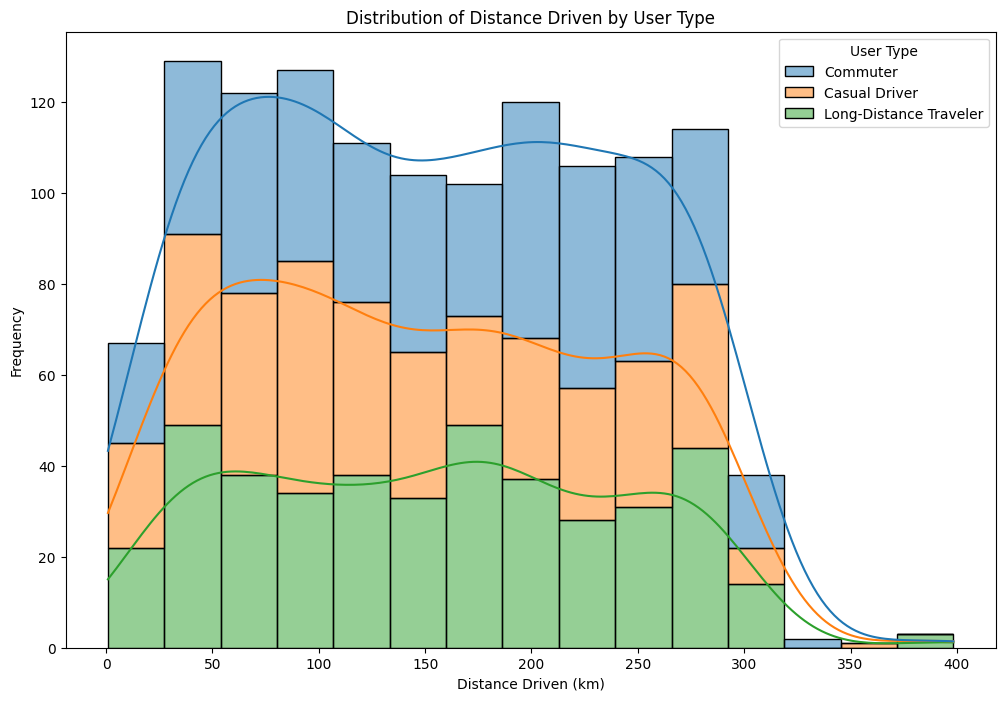

In [ ]:
# Histogram for 'Distance Driven' by 'User Type'
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Distance Driven (since last charge) (km)', hue='User Type', multiple='stack', kde=True)
plt.title('Distribution of Distance Driven by User Type')
plt.xlabel('Distance Driven (km)')
plt.ylabel('Frequency')
plt.show()

**Model Building**

In [ ]:

# Random Tree Regressor
data_numeric = data_Filtered_train_drop.select_dtypes(include=[np.number])
X = data_numeric.drop('Distance Driven (since last charge) (km)', axis=1)
y = data_numeric['Distance Driven (since last charge) (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print("*******************************************************************")

# GBM
gbm_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'GBM - Mean Absolute Error: {mae_gbm}')
print(f'GBM - Mean Squared Error: {mse_gbm}')
print(f'GBM - Root Mean Squared Error: {rmse_gbm}')
print(f'GBM - R-squared: {r2_gbm}')
print("*******************************************************************")

# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - Mean Absolute Error: {mae_svr}')
print(f'SVR - Mean Squared Error: {mse_svr}')
print(f'SVR - Root Mean Squared Error: {rmse_svr}')
print(f'SVR - R-squared: {r2_svr}')
print("*******************************************************************")

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN - Mean Absolute Error: {mae_knn}')
print(f'KNN - Mean Squared Error: {mse_knn}')
print(f'KNN - Root Mean Squared Error: {rmse_knn}')
print(f'KNN - R-squared: {r2_knn}')


Mean Absolute Error: 27.785989255869843
Mean Squared Error: 1058.6037959909347
Root Mean Squared Error: 32.53619209420388
R-squared: 0.8497056545517867
*******************************************************************
GBM - Mean Absolute Error: 79.18789475187772
GBM - Mean Squared Error: 8607.142163139071
GBM - Root Mean Squared Error: 92.77468492611048
GBM - R-squared: -0.22199145939939813
*******************************************************************
SVR - Mean Absolute Error: 73.82331135243099
SVR - Mean Squared Error: 7082.676445221104
SVR - Root Mean Squared Error: 84.1586385656345
SVR - R-squared: -0.005556776187017665
*******************************************************************
KNN - Mean Absolute Error: 78.88487261320337
KNN - Mean Squared Error: 8881.604689351067
KNN - Root Mean Squared Error: 94.24226593917967
KNN - R-squared: -0.26095803583083965
